In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import warnings
import matplotlib.gridspec as gridspec

warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning, message=".*set_ticklabels.*")

# Identificacion de regiones conservadas

In [2]:
def delete_path(string):
    if '/' in string:
        x = string.split('/')
        if x[len(x)-1] == '':
            x = x[len(x)-2]
        else:
            x = x[len(x)]
        if 'human' in x: 
            return x.split('_human')[0]
        return x
    else:
        return string

In [3]:
path = '/home/ferambriz/Projects/SARS-CoV-2/Data/Estratos/entropy'


# global
df = pd.read_csv(f'{path}/raw_data_entropy_Human.tsv', sep = '\t')
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df.replace({'BloqueHuman/':'Global'}, inplace = True)
df5 = df[df['Region'] == "5'UTR"]
df3 = df[df['Region'] == "3'UTR"]

#por variantes
df_v = pd.read_csv(f'{path}/raw_data_entropy_variants.tsv', sep = '\t')
df_v.drop(['Unnamed: 0'], axis=1, inplace=True)

df5_v = df_v[df_v['Region'] == "5'UTR"]
df3_v = df_v[df_v['Region'] == "3'UTR"]

#por tiempo
df_t = pd.read_csv(f'{path}/raw_data_entropy_temporal.tsv', sep = '\t')
df_t.drop(['Unnamed: 0'], axis=1, inplace=True)

df5_t = df_t[df_t['Region'] == "5'UTR"]
df3_t = df_t[df_t['Region'] == "3'UTR"]

# cluster geografico temporal 
df_gt = pd.read_csv(f'{path}/raw_data_entropy_constant_clusters.tsv', sep = '\t')
df_gt.drop(['Unnamed: 0'], axis=1, inplace=True)

df5_gt = df_gt[df_gt['Region'] == "5'UTR"]
df3_gt = df_gt[df_gt['Region'] == "3'UTR"]

# cluster geografico k5
df_s = pd.read_csv(f'{path}/raw_data_entropy_spectral.tsv', sep = '\t')
df_s.drop(['Unnamed: 0'], axis=1, inplace=True)


df5_s = df_s[df_s['Region'] == "5'UTR"]
df3_s = df_s[df_s['Region'] == "3'UTR"]

# cluster geografico spectrum (k4)
df_sp = pd.read_csv(f'{path}/raw_data_entropy_spectrum.tsv', sep = '\t')
df_sp.drop(['Unnamed: 0'], axis=1, inplace=True)


df5_sp = df_sp[df_sp['Region'] == "5'UTR"]
df3_sp = df_sp[df_sp['Region'] == "3'UTR"]


# union 
df5v = pd.concat([df5, df5_v])
df3v = pd.concat([df3, df3_v])
df5v['Variant'] = list(map(delete_path, df5v['Variant']))
df3v['Variant'] = list(map(delete_path, df3v['Variant']))

df5t = pd.concat([df5, df5_t])
df3t = pd.concat([df3, df3_t])
df5t['Variant'] = list(map(delete_path, df5t['Variant']))
df3t['Variant'] = list(map(delete_path, df3t['Variant']))


df5gt = pd.concat([df5, df5_gt])
df3gt = pd.concat([df3, df3_gt])

df5gt['Variant'] = list(map(delete_path, df5gt['Variant']))
df3gt['Variant'] = list(map(delete_path, df3gt['Variant']))

df5gt.replace({'Cluster_0':'Gst1', 'Cluster_1':'Gst2'}, inplace = True)
df3gt.replace({'Cluster_0':'Gst1', 'Cluster_1':'Gst2'}, inplace = True)

df5s = pd.concat([df5, df5_s])
df3s = pd.concat([df3, df3_s])
df5s['Variant'] = list(map(delete_path, df5s['Variant']))
df3s['Variant'] = list(map(delete_path, df3s['Variant']))

df5s.replace({'Estrato_0':'G1', 'Estrato_1':'G2', 'Estrato_2':'G3', 
               'Estrato_3':'G4', 'Estrato_4':'G5'}, inplace = True)
df3s.replace({'Estrato_0':'G1', 'Estrato_1':'G2', 'Estrato_2':'G3', 
               'Estrato_3':'G4', 'Estrato_4':'G5'}, inplace = True)

df5sp = pd.concat([df5, df5_sp])
df3sp = pd.concat([df3, df3_sp])
df5sp['Variant'] = list(map(delete_path, df5sp['Variant']))
df3sp['Variant'] = list(map(delete_path, df3sp['Variant']))

df5sp.replace({'Cluster_1':'Gs1', 'Cluster_2':'Gs2', 'Cluster_3':'Gs3', 
               'Cluster_4':'Gs4'}, inplace = True)
df3sp.replace({'Cluster_1':'Gs1', 'Cluster_2':'Gs2', 'Cluster_3':'Gs3', 
               'Cluster_4':'Gs4'}, inplace = True)

df5sp

/tmp/ipykernel_4583/3906397101.py:33: DtypeWarning: Columns (1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df_s = pd.read_csv(f'{path}/raw_data_entropy_spectral.tsv', sep = '\t')


,Site,H,Region,Variant
0,1,0.597737,5'UTR,Global
1,2,0.325213,5'UTR,Global
2,3,0.219767,5'UTR,Global
3,4,0.381892,5'UTR,Global
4,5,0.239893,5'UTR,Global
...,...,...,...,...
89972,261,0.001842710544545771,5'UTR,Gs4
89973,262,0.00035849158745396075,5'UTR,Gs4
89974,263,0.0009751035103248571,5'UTR,Gs4
89975,264,0.0018398193608110019,5'UTR,Gs4


In [4]:
colores = {
    'Global': 'red',
    'nan': 'gray',
    np.nan : '#535F68',
    '19A': '#117A65',
    '20B': '#ff7f0e',
    '20A': '#2ca02c',
    '19B': '#d62728',
    'recombinant': '#9467bd',
    '21J': '#45B39D',
    '20D': '#e377c2',
    '21K': '#7f7f7f',
    '20C': '#bcbd22',
    '21A': '#17becf',
    '20E': '#1c9099',
    '22E': '#a6cee3',
    '22B': '#1f78b4',
    '21L': '#b2df8a',
    '22D': '#33a02c',
    '20I': '#fb9a99',
    '21I': '#e31a1c',
    '22F': '#fdbf6f',
    '22A': '#ff7f00',
    '20H': '#cab2d6',
    '23D': '#6a3d9a',
    '23A': '#ffff99',
    '20J': '#b15928',
    '20G': '#fbb4ae',
    '22C': '#b3cde3',
    '21H': '#ccebc5',
    '23C': '#decbe4',
    '21D': '#fed9a6',
    '21M': '#ffffcc',
    '21F': '#e5d8bd',
    '23E': '#fddaec',
    '21G': '#f2f2f2',
    '23B': '#393b79',
    '21C': '#5254a3',
    '20F': '#6b6ecf',
    '21E': '#9c9ede',
    '21B': '#637939',
    '23F': '#58D68D',
    '(2010-12-05,2020-03-01]': '#EC7063',
    '(2020-03-01,2020-09-01]': '#58D68D',
    '(2020-09-01,2021-01-01]': '#EC7063',
    '(2021-01-01,2021-05-01]': "#EDBB99",
    '(2021-05-01,2022-01-01]': "purple",
    '(2022-01-01,2022-06-01]': "orange",
    '(2022-06-01,2022-11-01]': "blue",
    '(2022-11-01,2023-01-01]': "#85929E",
    '(2023-01-01,2023-07-01]': "#138D75",
    '(2023-07-01,2023-09-06]': '#A2D9CE',
    'G4':'#6a3d9a',
    'G5':'#45B39D',
    'G1':'#5254a3',
    'G3':'#ff7f0e',
    'G2': '#decbe4',
    'Gs2':'#ff7f0e',
    'Gs4':'#45B39D',
    'Gs3':'#6a3d9a',
    'Gs1':'#5254a3',
    'Gst1':'#6a3d9a',
    'Gst2':'#45B39D'
}

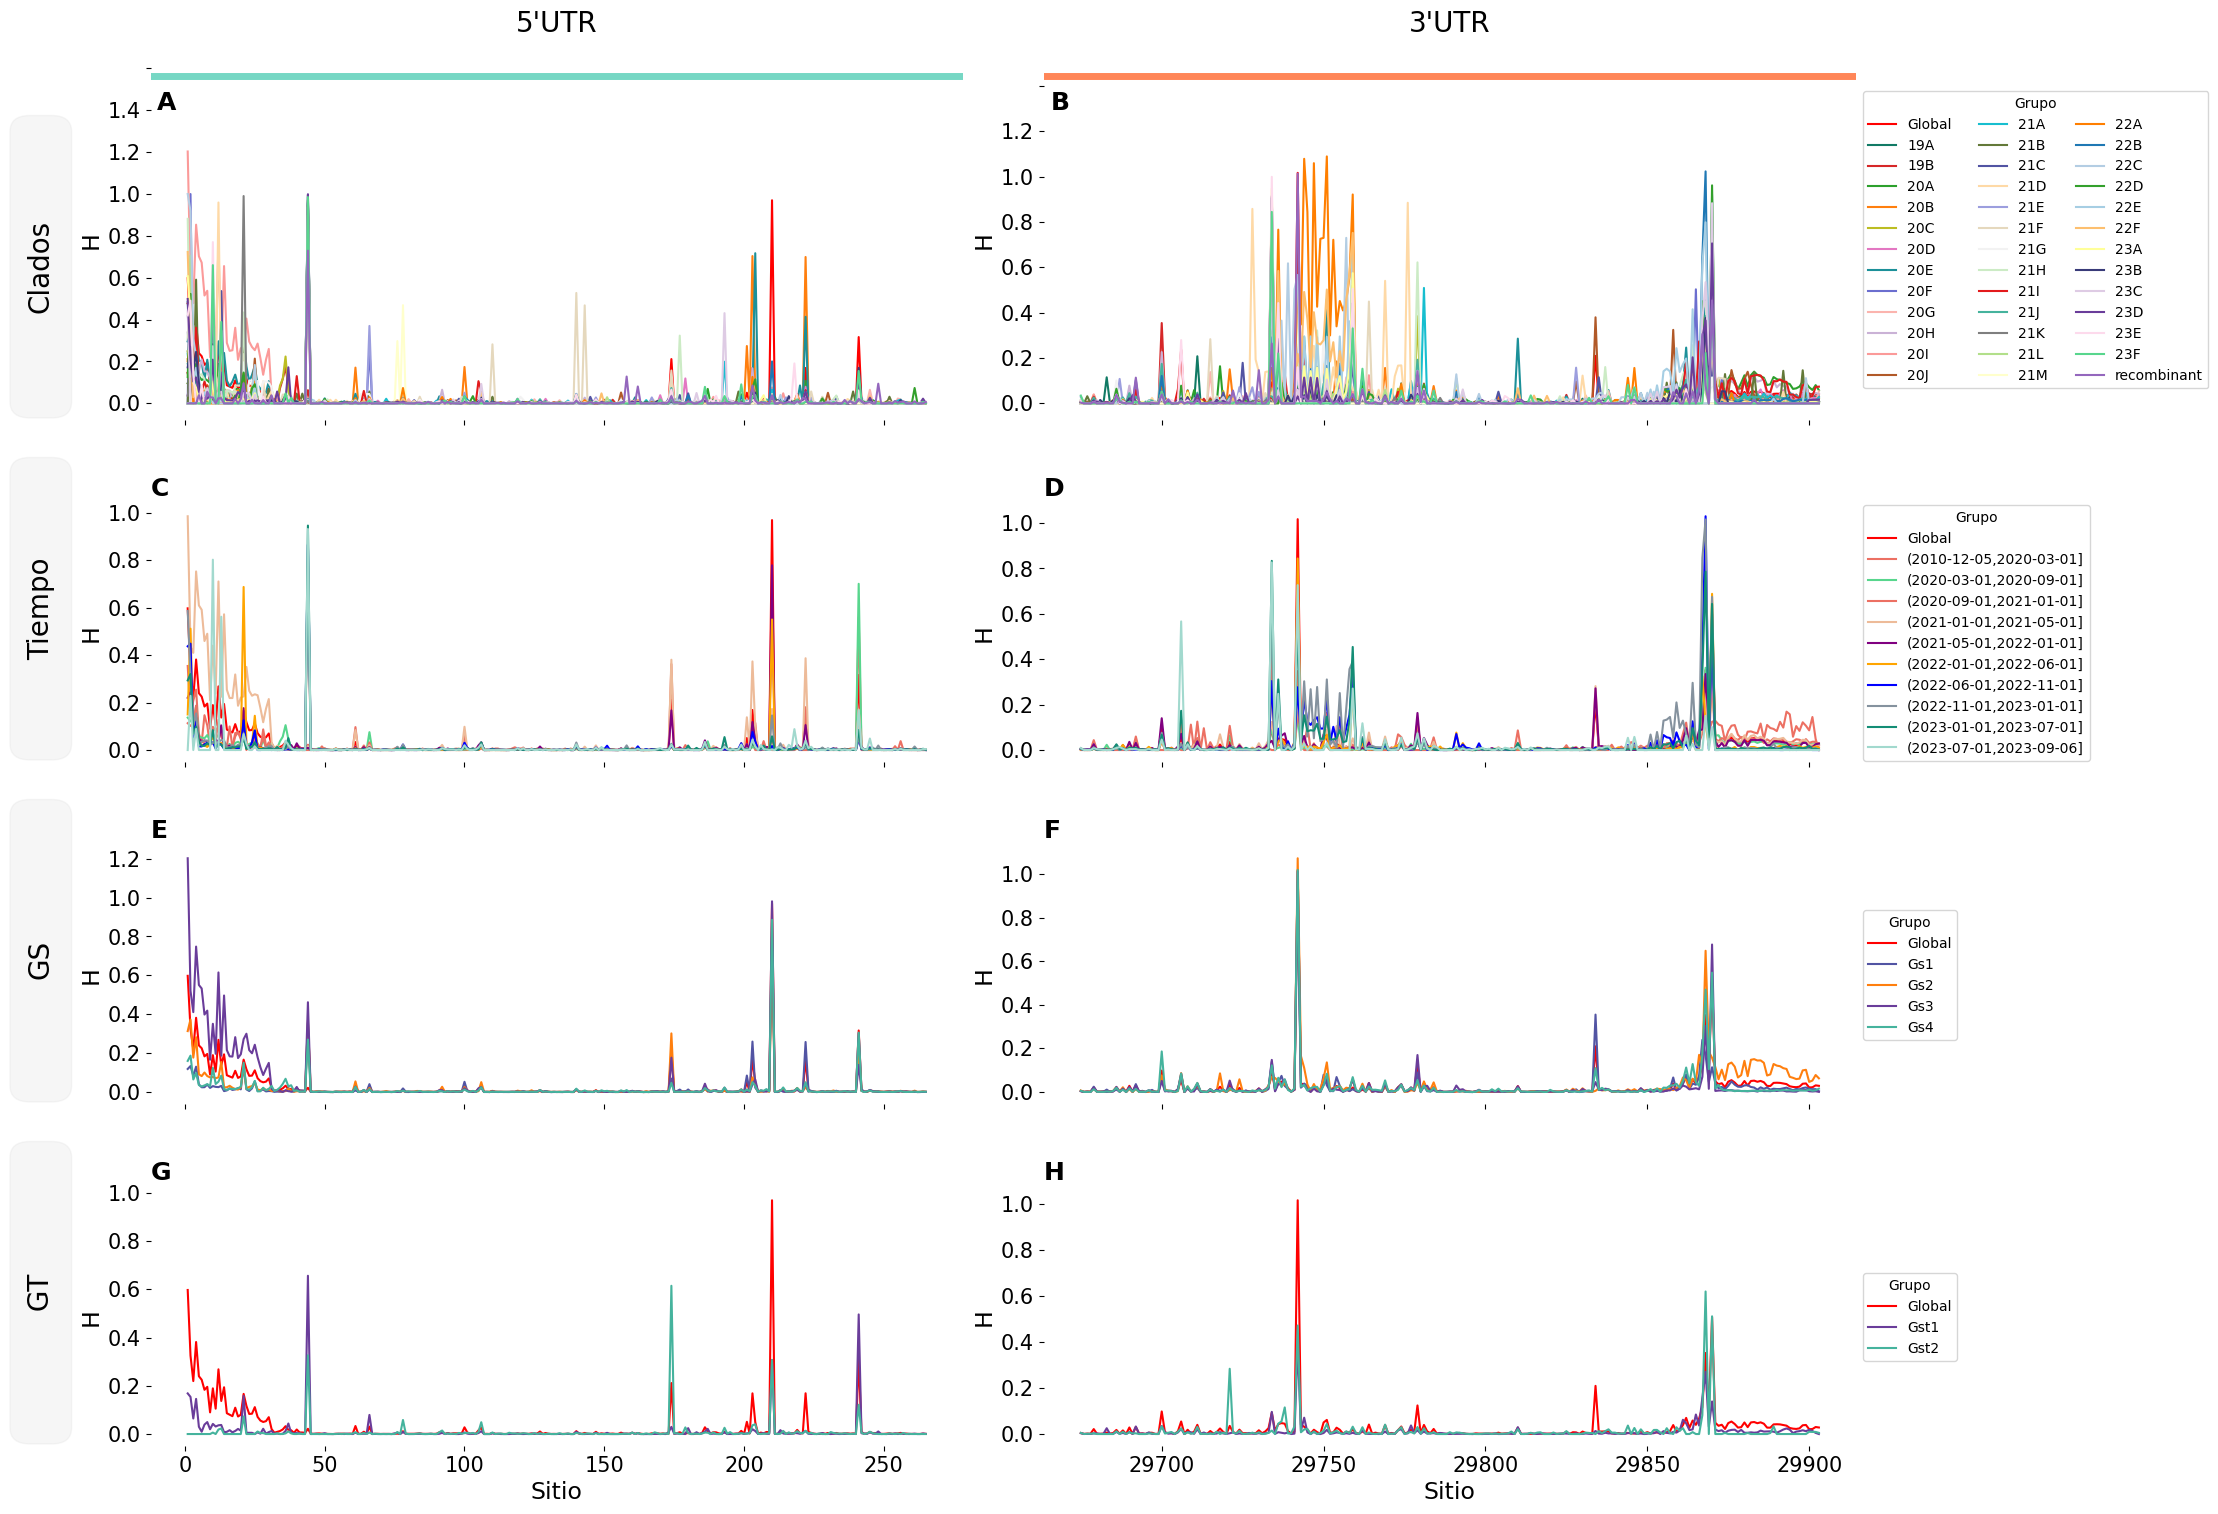

In [102]:
import matplotlib.ticker as ticker
import matplotlib.patches as patches

fig, axs = plt.subplots(4, 2, sharex='col', figsize=(22, 18),  gridspec_kw={'height_ratios': [14, 10, 10, 10]})

fontsize_ticks = 15; fontsize_incisos = 18
#===================================== first plot on the top =============================
sns.lineplot(data=df5v, x="Site", y='H', hue='Variant', palette=colores, ax=axs[0, 0], legend=False)
axs[0, 0].annotate('A', xy=(0.02, 0.88), xycoords='axes fraction', fontsize=fontsize_incisos, fontweight='bold', ha='center', va='center')
axs[0, 0].set_title("5'UTR", fontsize=20, pad=20)
axs[0, 0].invert_yaxis()
axs[0, 0].tick_params(axis='x', labelsize=fontsize_ticks)
axs[0, 0].set_yticklabels(axs[0, 0].get_yticklabels(), fontsize=fontsize_ticks)
axs[0, 0].set_xlabel('Sitio', fontsize=fontsize_ticks+2)
axs[0, 0].set_ylabel('H', fontsize=fontsize_ticks+2)
sns.despine(left=True, bottom=True)
axs[0, 0].axhline(y=axs[0, 0].get_ylim()[1]+ 0.3, color='#76d7c4', linewidth=5)


#===================================== second plot on the top =============================
sns.lineplot(data=df3v, x="Site", y='H', hue='Variant', palette=colores, ax=axs[0, 1])
axs[0, 1].annotate('B', xy=(0.02, 0.88), xycoords='axes fraction', fontsize=fontsize_incisos, fontweight='bold', ha='center', va='center')
axs[0, 1].set_title("3'UTR", fontsize=20, pad=20)
axs[0, 1].invert_yaxis()
axs[0, 1].tick_params(axis='x', labelsize=fontsize_ticks)
axs[0, 1].set_yticklabels(axs[0, 1].get_yticklabels(), fontsize=fontsize_ticks)
axs[0, 1].set_xlabel('Sitio', fontsize=fontsize_ticks+2)
axs[0, 1].set_ylabel('H', fontsize=fontsize_ticks+2)
axs[0, 1].legend(title='Grupo', ncol=3, bbox_to_anchor=(1, 0.5), loc='center left')
sns.despine(left=True, bottom=True)
axs[0, 1].axhline(y=axs[0, 1].get_ylim()[1]+ 0.3, color='#ff8658', linewidth=5)

#===================================== third plot on the top =============================
sns.lineplot(data=df5t, x="Site", y='H', hue = 'Variant', palette = colores, ax=axs[1, 0], legend=False)
axs[1, 0].set_title('C', fontweight='bold', loc = 'left', fontsize = fontsize_incisos)
axs[1, 0].invert_yaxis()
axs[1, 0].set_yticklabels(axs[1, 0].get_yticklabels(), fontsize=fontsize_ticks)
axs[1, 0].set_xlabel('Sitio', fontsize=fontsize_ticks+2)
axs[1, 0].set_ylabel('H', fontsize=fontsize_ticks+2)
sns.despine(left=True, bottom=True)

#===================================== four plot on the top =============================
sns.lineplot(data=df3t, x="Site", y='H', hue = 'Variant', palette = colores, ax = axs[1, 1])
axs[1, 1].set_title('D', fontweight='bold', loc = 'left', fontsize = fontsize_incisos)
axs[1, 1].invert_yaxis()
axs[1, 1].set_yticklabels(axs[1, 1].get_yticklabels(), fontsize=fontsize_ticks)
axs[1, 1].set_xlabel('Sitio', fontsize=fontsize_ticks+2)
axs[1, 1].set_ylabel('H', fontsize=fontsize_ticks+2)
axs[1, 1].legend(title='Grupo', bbox_to_anchor=(1, 0.5), loc='center left')
sns.despine(left=True, bottom=True)

#===================================== five plot on the top =============================
sns.lineplot(data=df5sp, x="Site", y='H', hue = 'Variant', palette = colores, ax = axs[2, 0], legend=False)
axs[2, 0].set_title('E', fontweight='bold', loc = 'left', fontsize = fontsize_incisos)
axs[2, 0].invert_yaxis()
axs[2, 0].set_yticklabels(axs[2, 0].get_yticklabels(), fontsize=fontsize_ticks)
axs[2, 0].set_xlabel('Sitio', fontsize=fontsize_ticks+2)
axs[2, 0].set_ylabel('H', fontsize=fontsize_ticks+2)
sns.despine(left=True, bottom=True)

#===================================== six plot on the top =============================
sns.lineplot(data=df3sp, x="Site", y='H', hue = 'Variant', palette = colores, ax = axs[2, 1])
axs[2, 1].set_title('F', fontweight='bold', loc = 'left', fontsize = fontsize_incisos)
axs[2, 1].invert_yaxis()
axs[2, 1].set_yticklabels(axs[2, 1].get_yticklabels(), fontsize=fontsize_ticks)
axs[2, 1].set_xlabel('Sitio', fontsize=fontsize_ticks+2)
axs[2, 1].set_ylabel('H', fontsize=fontsize_ticks+2)
axs[2, 1].legend(title='Grupo', bbox_to_anchor=(1, 0.5), loc='center left')
sns.despine(left=True, bottom=True)

#===================================== seven plot on the top =============================
sns.lineplot(data=df5gt, x="Site", y='H', hue = 'Variant', palette = colores, ax = axs[3, 0], legend=False)
axs[3, 0].set_title('G', fontweight='bold', loc = 'left', fontsize = fontsize_incisos)
axs[3, 0].invert_yaxis()
axs[3, 0].tick_params(axis='x', labelsize=fontsize_ticks)
axs[3, 0].set_yticklabels(axs[3, 0].get_yticklabels(), fontsize=fontsize_ticks)
axs[3, 0].set_xlabel('Sitio', fontsize=fontsize_ticks+2)
axs[3, 0].set_ylabel('H', fontsize=fontsize_ticks+2)
sns.despine(left=True, bottom=True)


#===================================== eight plot on the top =============================
sns.lineplot(data=df3gt, x="Site", y='H', hue = 'Variant', palette = colores, ax = axs[3, 1])
axs[3, 1].set_title('H', fontweight='bold', loc = 'left', fontsize = fontsize_incisos)
axs[3, 1].invert_yaxis()
axs[3, 1].tick_params(axis='x', labelsize=fontsize_ticks)
axs[3, 1].set_yticklabels(axs[3, 1].get_yticklabels(), fontsize=fontsize_ticks)
axs[3, 1].set_xlabel('Sitio', fontsize=fontsize_ticks+2)
axs[3, 1].set_ylabel('H', fontsize=fontsize_ticks+2)
axs[3, 1].legend(title='Grupo', bbox_to_anchor=(1, 0.5), loc='center left')
sns.despine(left=True, bottom=True)



# Agregar títulos a las filas en vertical
fig.text(0.075, 0.765, 'Clados', ha='center', va='center', rotation='vertical', fontsize=20)
fig.text(0.075, 0.575, 'Tiempo', ha='center', va='center', rotation='vertical', fontsize=20)
fig.text(0.075, 0.38, 'GS', ha='center', va='center', rotation='vertical', fontsize=20)
fig.text(0.075, 0.195, ' GT ', ha='center', va='center', rotation='vertical', fontsize=20)

rect = patches.FancyBboxPatch((0.07, 0.69), 0.01, 0.15, boxstyle="round,pad=0.009", 
                              edgecolor='lightgrey', facecolor='lightgrey', alpha = 0.2)
fig.add_artist(rect)


rect = patches.FancyBboxPatch((0.07, 0.50), 0.01, 0.15, boxstyle="round,pad=0.009", 
                              edgecolor='lightgrey', facecolor='lightgrey', alpha = 0.2)
fig.add_artist(rect)

rect = patches.FancyBboxPatch((0.07, 0.31), 0.01, 0.15, boxstyle="round,pad=0.009", 
                              edgecolor='lightgrey', facecolor='lightgrey', alpha = 0.2)
fig.add_artist(rect)

rect = patches.FancyBboxPatch((0.07, 0.12), 0.01, 0.15, boxstyle="round,pad=0.009", 
                              edgecolor='lightgrey', facecolor='lightgrey', alpha = 0.2)
fig.add_artist(rect)




plt.subplots_adjust(wspace=0.1, hspace=0.3)


plt.savefig("../../Plots/EntropyStratified2.pdf", bbox_inches='tight')

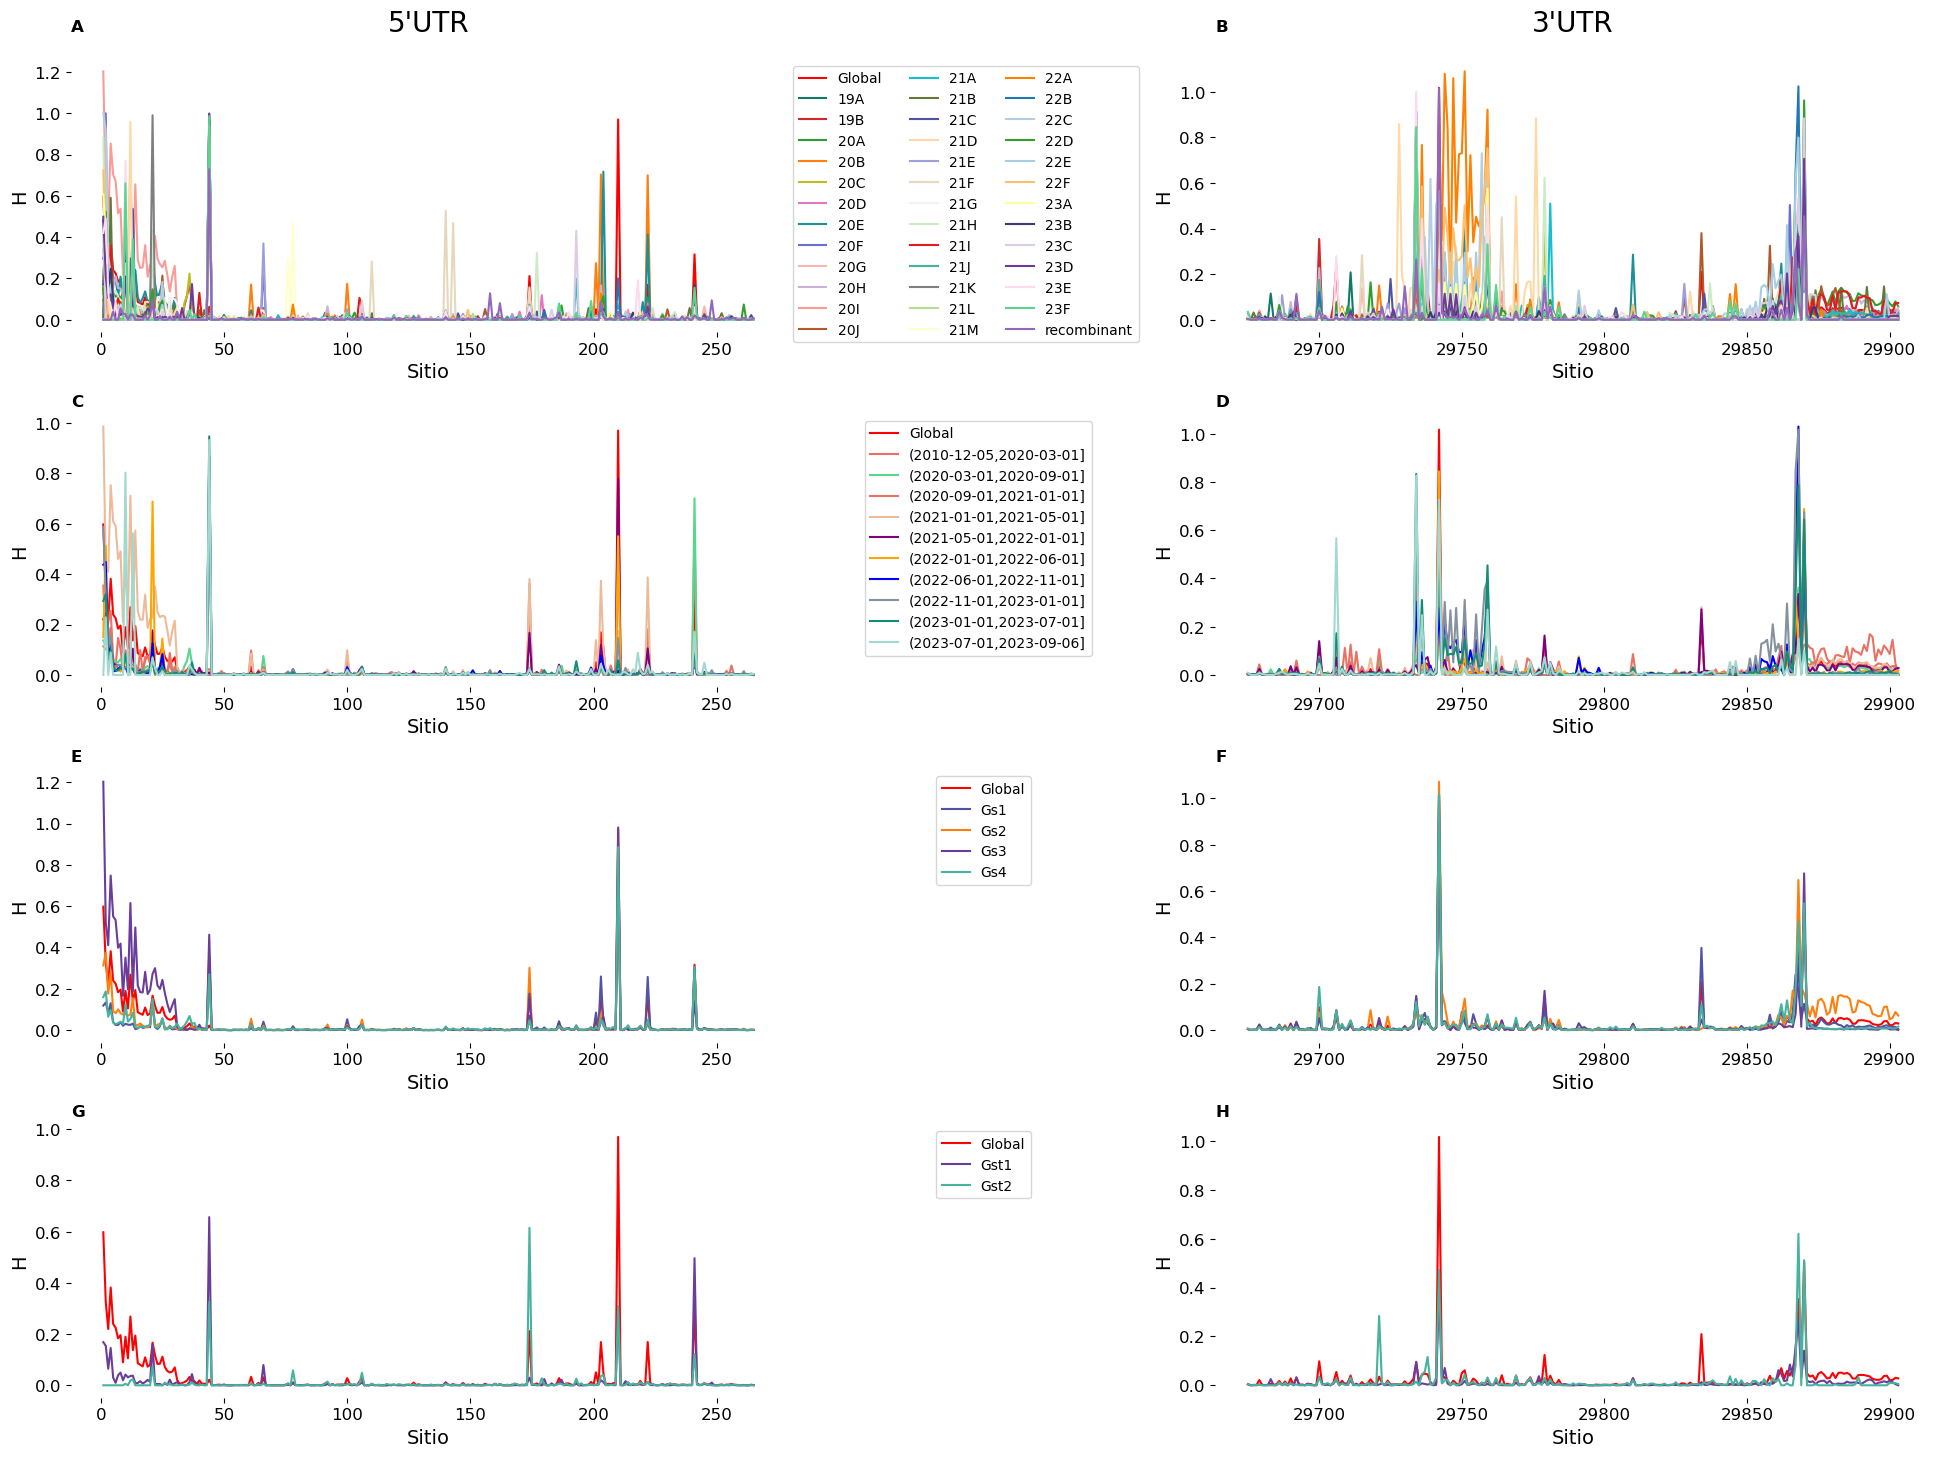

In [22]:
fig = plt.figure(figsize=(24, 22))

gs = gridspec.GridSpec(5, 2) #height_ratios=[5,5,5], width_ratios=[12,12])

#===================================== first plot on the top =============================
ax1 = fig.add_subplot(gs[1, 0])
ax1 = sns.lineplot(data=df5v, x="Site", y='H', hue = 'Variant', palette = colores)

ax1.set_title('A', fontweight='bold', loc = 'left')
ax1.set_title("5'UTR", fontsize=20, pad=20)

ax1.invert_yaxis()  # Invierte el eje Y

ax1.set_xticklabels(ax1.get_xticklabels(), fontsize=12)
ax1.set_yticklabels(ax1.get_yticklabels(), fontsize=12)


ax1.set_xlabel('Sitio', fontsize=14)
ax1.set_ylabel('H', fontsize=14)


#plt.xticks(rotation=45)
plt.legend(ncol=3, bbox_to_anchor=(1, 1), loc='upper left')
#plt.legend(ncol=2)
sns.despine(left=True, bottom=True)

#===================================== second plot on the top =============================
ax2 = fig.add_subplot(gs[1, 1])
ax2 = sns.lineplot(data=df3v, x="Site", y='H', hue = 'Variant', palette = colores, legend = False)

ax2.set_title('B', fontweight='bold', loc = 'left')
ax2.set_title("3'UTR", fontsize=20, pad=20)

ax2.invert_yaxis()  # Invierte el eje Y

ax2.set_xticklabels(ax2.get_xticklabels(), fontsize=12)
ax2.set_yticklabels(ax2.get_yticklabels(), fontsize=12)


ax2.set_xlabel('Sitio', fontsize=14)
ax2.set_ylabel('H', fontsize=14)



#plt.xticks(rotation=45)
#plt.legend(ncol=2, bbox_to_anchor=(1.05, 1), loc='upper left')
sns.despine(left=True, bottom=True)


#===================================== third plot on the top =============================
ax3 = fig.add_subplot(gs[2, 0])
ax3 = sns.lineplot(data=df5t, x="Site", y='H', hue = 'Variant', palette = colores)

ax3.set_title('C', fontweight='bold', loc = 'left')
#ax2.set_title("5'UTR por cluster temporal", fontsize=10, pad=20)

ax3.invert_yaxis()  # Invierte el eje Y


ax3.set_xticklabels(ax3.get_xticklabels(), fontsize=12)
ax3.set_yticklabels(ax3.get_yticklabels(), fontsize=12)


ax3.set_xlabel('Sitio', fontsize=14)
ax3.set_ylabel('H', fontsize=14)


#plt.xticks(rotation=45)
plt.legend(ncol=1, bbox_to_anchor=(1.1, 1), loc='upper left')
#plt.legend(ncol=2)
sns.despine(left=True, bottom=True)

#===================================== four plot on the top =============================
ax4 = fig.add_subplot(gs[2, 1])
ax4 = sns.lineplot(data=df3t, x="Site", y='H', hue = 'Variant', palette = colores, legend = False)

ax4.set_title('D', fontweight='bold', loc = 'left')
#ax3.set_title("3'UTR' por cluster temporal", fontsize=10, pad=20)

ax4.invert_yaxis()  # Invierte el eje Y

ax4.set_xticklabels(ax4.get_xticklabels(), fontsize=12)
ax4.set_yticklabels(ax4.get_yticklabels(), fontsize=12)


ax4.set_xlabel('Sitio', fontsize=14)
ax4.set_ylabel('H', fontsize=14)


#plt.xticks(rotation=45)
#plt.legend(ncol=2, bbox_to_anchor=(1.05, 1), loc='upper left')
sns.despine(left=True, bottom=True)

#===================================== four plot on the top =============================
ax5 = fig.add_subplot(gs[3, 0])
ax5 = sns.lineplot(data=df5sp, x="Site", y='H', hue = 'Variant', palette = colores)

ax5.set_title('E', fontweight='bold', loc = 'left')
#ax4.set_title("5'UTR spectrum", fontsize=10, pad=20)

ax5.invert_yaxis()  # Invierte el eje Y

ax5.set_xticklabels(ax5.get_xticklabels(), fontsize=12)
ax5.set_yticklabels(ax5.get_yticklabels(), fontsize=12)


ax5.set_xlabel('Sitio', fontsize=14)
ax5.set_ylabel('H', fontsize=14)


#plt.xticks(rotation=45)
plt.legend(ncol=1, bbox_to_anchor=(1.2, 1), loc='upper left')
#plt.legend(ncol=2)
sns.despine(left=True, bottom=True)

#===================================== five plot on the top =============================
ax6 = fig.add_subplot(gs[3, 1])
ax6 = sns.lineplot(data=df3sp, x="Site", y='H', hue = 'Variant', palette = colores, legend = False)

ax6.set_title('F', fontweight='bold', loc = 'left')
#ax5.set_title("3'UTR' spectrum", fontsize=10, pad=20)

ax6.invert_yaxis()  # Invierte el eje Y

ax6.set_xticklabels(ax6.get_xticklabels(), fontsize=12)
ax6.set_yticklabels(ax6.get_yticklabels(), fontsize=12)


ax6.set_xlabel('Sitio', fontsize=14)
ax6.set_ylabel('H', fontsize=14)

#plt.xticks(rotation=45)
#plt.legend(ncol=2, bbox_to_anchor=(1.05, 1), loc='upper left')
sns.despine(left=True, bottom=True)


#===================================== five plot on the top =============================
ax7 = fig.add_subplot(gs[4, 0])
ax7 = sns.lineplot(data=df5gt, x="Site", y='H', hue = 'Variant', palette = colores)

ax7.set_title('G', fontweight='bold', loc = 'left')
#ax5.set_title("5'UTR spectrum + clusters constantes en t", fontsize=10, pad=20)

ax7.invert_yaxis()  # Invierte el eje Y

ax7.set_xticklabels(ax7.get_xticklabels(), fontsize=12)
ax7.set_yticklabels(ax7.get_yticklabels(), fontsize=12)


ax7.set_xlabel('Sitio', fontsize=14)
ax7.set_ylabel('H', fontsize=14)

#plt.xticks(rotation=45)
plt.legend(ncol=1, bbox_to_anchor=(1.2, 1), loc='upper left')
#plt.legend(ncol=2)
sns.despine(left=True, bottom=True)


#===================================== five plot on the top =============================
ax8 = fig.add_subplot(gs[4, 1])
ax8 = sns.lineplot(data=df3gt, x="Site", y='H', hue = 'Variant', palette = colores, legend = False)

ax8.set_title('H', fontweight='bold', loc = 'left')
#ax6.set_title("3'UTR' spectrum + clusters constantes en t", fontsize=10, pad=20)

ax8.invert_yaxis()  # Invierte el eje Y

ax8.set_xticklabels(ax8.get_xticklabels(), fontsize=12)
ax8.set_yticklabels(ax8.get_yticklabels(), fontsize=12)


ax8.set_xlabel('Sitio', fontsize=14)
ax8.set_ylabel('H', fontsize=14)

#plt.xticks(rotation=45)
#plt.legend(ncol=2, bbox_to_anchor=(1.05, 1), loc='upper left')
sns.despine(left=True, bottom=True)


plt.subplots_adjust(wspace=0.6, hspace=0.3)


plt.savefig("../../Plots/EntropyStratified2.pdf", bbox_inches='tight')

In [24]:
df5v['H'] = pd.to_numeric(df5v['H'], errors='coerce')
df5v[['H', 'Variant']].groupby('Variant').mean()

,H
Variant,
19A,0.005813
19B,0.009014
20A,0.014624
20B,0.018600
20C,0.007868
20D,0.005991
20E,0.025366
20F,0.006167
20G,0.005292


In [25]:
df5gt['H'] = pd.to_numeric(df5gt['H'], errors='coerce')
df5gt[['H', 'Variant']].groupby('Variant').mean()

,H
Variant,
Global,0.028323
Gst1,0.011952
Gst2,0.008080


In [ ]:
df5v
df3v

df5t
df3t

df5sp
df3sp


df5gt
df3gt

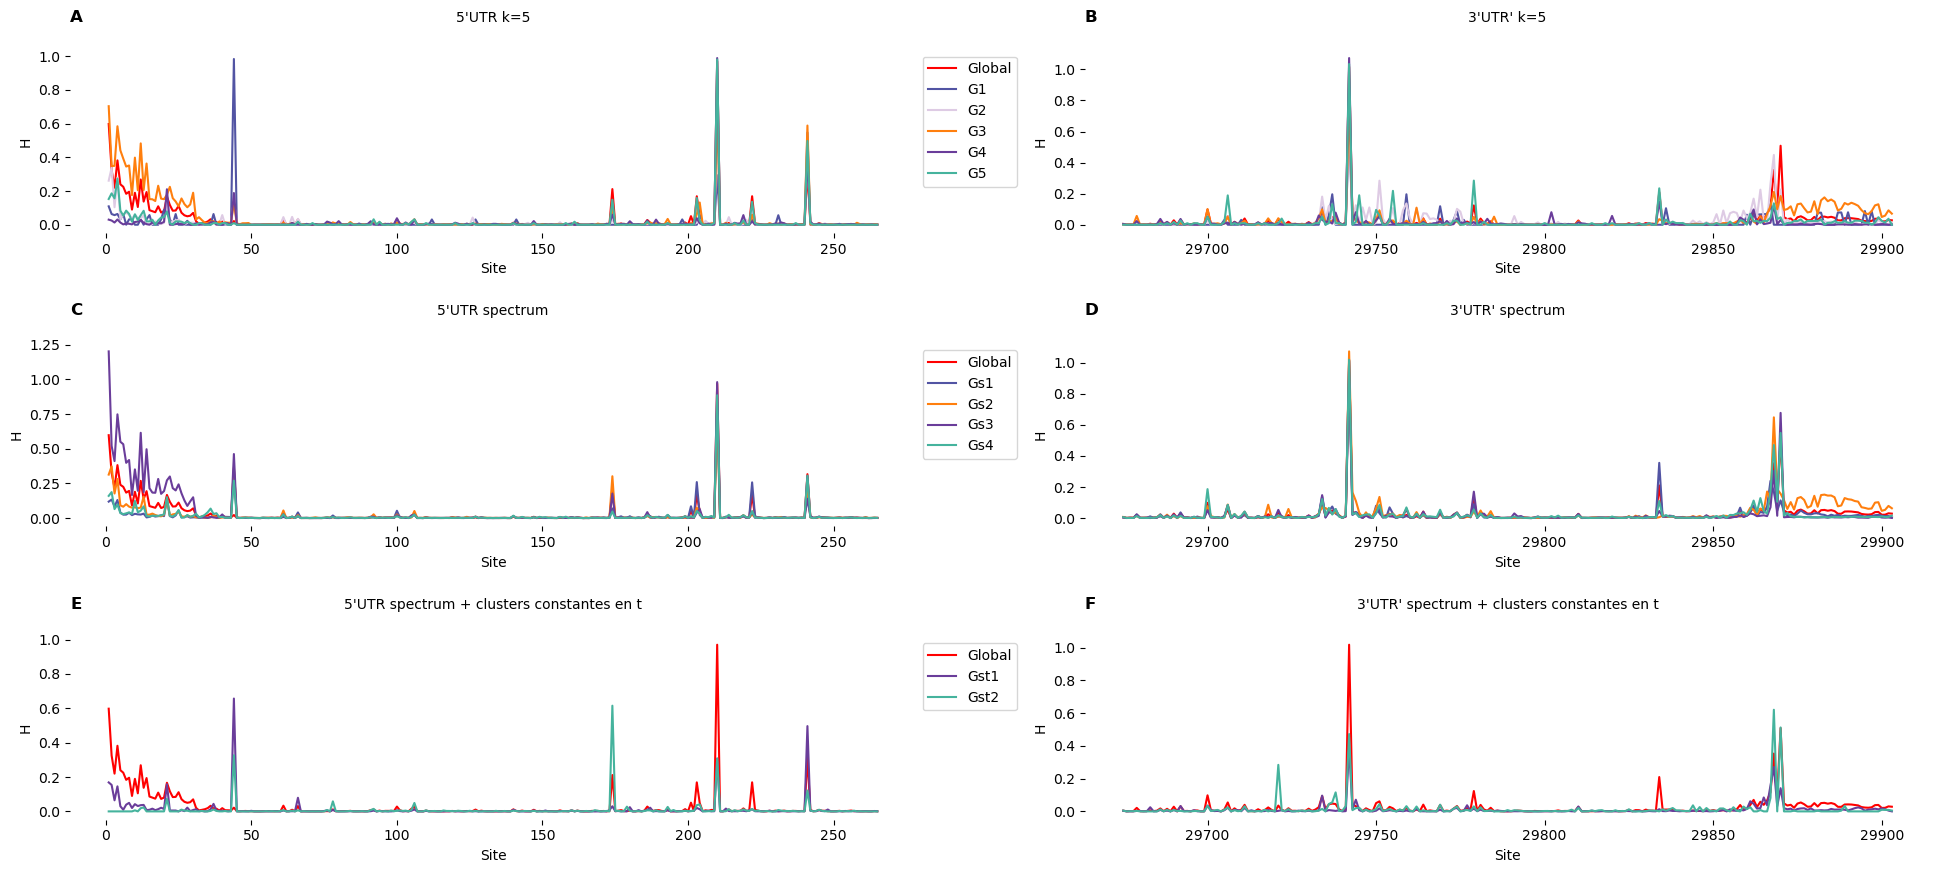

In [12]:
fig = plt.figure(figsize=(24, 10))
gs = gridspec.GridSpec(3, 2, height_ratios=[5,5,5], width_ratios=[12,12])


#===================================== second plot on the top =============================
ax2 = fig.add_subplot(gs[0, 0])
ax2 = sns.lineplot(data=df5s, x="Site", y='H', hue = 'Variant', palette = colores)

ax2.set_title('A', fontweight='bold', loc = 'left')
ax2.set_title("5'UTR k=5", fontsize=10, pad=20)

ax2.invert_yaxis()  # Invierte el eje Y

#plt.xticks(rotation=45)
plt.legend(ncol=1, bbox_to_anchor=(1, 1), loc='upper left')
#plt.legend(ncol=2)
sns.despine(left=True, bottom=True)

#===================================== third plot on the top =============================
ax3 = fig.add_subplot(gs[0, 1])
ax3 = sns.lineplot(data=df3s, x="Site", y='H', hue = 'Variant', palette = colores, legend = False)

ax3.set_title('B', fontweight='bold', loc = 'left')
ax3.set_title("3'UTR' k=5", fontsize=10, pad=20)

ax3.invert_yaxis()  # Invierte el eje Y

#plt.xticks(rotation=45)
#plt.legend(ncol=2, bbox_to_anchor=(1.05, 1), loc='upper left')
sns.despine(left=True, bottom=True)


#===================================== four plot on the top =============================
ax2 = fig.add_subplot(gs[1, 0])
ax2 = sns.lineplot(data=df5sp, x="Site", y='H', hue = 'Variant', palette = colores)

ax2.set_title('C', fontweight='bold', loc = 'left')
ax2.set_title("5'UTR spectrum", fontsize=10, pad=20)

ax2.invert_yaxis()  # Invierte el eje Y

#plt.xticks(rotation=45)
plt.legend(ncol=1, bbox_to_anchor=(1, 1), loc='upper left')
#plt.legend(ncol=2)
sns.despine(left=True, bottom=True)

#===================================== five plot on the top =============================
ax3 = fig.add_subplot(gs[1, 1])
ax3 = sns.lineplot(data=df3sp, x="Site", y='H', hue = 'Variant', palette = colores, legend = False)

ax3.set_title('D', fontweight='bold', loc = 'left')
ax3.set_title("3'UTR' spectrum", fontsize=10, pad=20)

ax3.invert_yaxis()  # Invierte el eje Y

#plt.xticks(rotation=45)
#plt.legend(ncol=2, bbox_to_anchor=(1.05, 1), loc='upper left')
sns.despine(left=True, bottom=True)


#===================================== five plot on the top =============================
ax4 = fig.add_subplot(gs[2, 0])
ax4 = sns.lineplot(data=df5gt, x="Site", y='H', hue = 'Variant', palette = colores)

ax4.set_title('E', fontweight='bold', loc = 'left')
ax4.set_title("5'UTR spectrum + clusters constantes en t", fontsize=10, pad=20)

ax4.invert_yaxis()  # Invierte el eje Y

#plt.xticks(rotation=45)
plt.legend(ncol=1, bbox_to_anchor=(1, 1), loc='upper left')
#plt.legend(ncol=2)
sns.despine(left=True, bottom=True)


#===================================== five plot on the top =============================
ax5 = fig.add_subplot(gs[2, 1])
ax5 = sns.lineplot(data=df3gt, x="Site", y='H', hue = 'Variant', palette = colores, legend = False)

ax5.set_title('F', fontweight='bold', loc = 'left')
ax5.set_title("3'UTR' spectrum + clusters constantes en t", fontsize=10, pad=20)

ax5.invert_yaxis()  # Invierte el eje Y

#plt.xticks(rotation=45)
#plt.legend(ncol=2, bbox_to_anchor=(1.05, 1), loc='upper left')
sns.despine(left=True, bottom=True)


plt.subplots_adjust(wspace=0.2, hspace=0.6)


plt.savefig("../../Plots/EntropyStratifiedGeographicCluster.pdf", bbox_inches='tight')

# k-means

In [7]:
def discret_entropy(df5z,df3z):
    df5z['H'] = list(map(float, df5z['H']))
    df3z['H'] = list(map(float, df3z['H']))
    
    data = np.array(list(df5z['H'])).reshape(-1, 1)
    kmeans = KMeans(n_clusters=6)
    kmeans.fit(data)

    df5z['Group'] = kmeans.labels_
    x = {}
    for i in pd.unique(df5z['Group']):
        x[i] = df5z[df5z['Group'] == i].mean()['H']
    
    print(x)
    
    etiquetas = ['High-conserved', 'Conserved', 'Semi-conserved', 'Variable', 'Variable',  'Variable']
    # Ordenamos el diccionario por valor
    diccionario_ordenado = dict(sorted(x.items(), key=lambda item: item[1]))
    
    # Asignamos las etiquetas
    diccionario_etiquetado = {k: etiquetas[i] for i, k in enumerate(diccionario_ordenado.keys())}
    print(diccionario_etiquetado)
    df5z['Group'] = df5z['Group'].map(diccionario_etiquetado)


    
    data = np.array(list(df3z['H'])).reshape(-1, 1)

    kmeans = KMeans(n_clusters=5)
    kmeans.fit(data)
    df3z['Group'] = kmeans.labels_
    
    x = {}
    for i in pd.unique(df3z['Group']):
        x[i] = df3z[df3z['Group'] == i].mean()['H']
    print(x)
    
    diccionario_ordenado = dict(sorted(x.items(), key=lambda item: item[1]))
    
    # Asignamos las etiquetas
    diccionario_etiquetado = {k: etiquetas[i] for i, k in enumerate(diccionario_ordenado.keys())}
    print(diccionario_etiquetado)

    df3z['Group'] = df3z['Group'].map(diccionario_etiquetado)
    df = pd.concat([df5z, df3z])
    return df

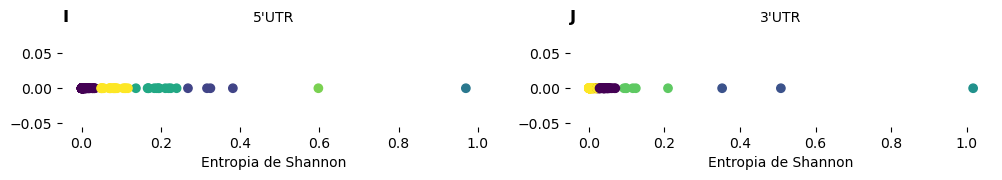

In [23]:
fig = plt.figure(figsize=(12, 1))
gs = gridspec.GridSpec(1, 2, height_ratios=[5], width_ratios=[4, 4])

# 5 UTR
ax1 = fig.add_subplot(gs[0, 0])
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax1.spines['left'].set_visible(False)

data = np.array(list(df5['H'])).reshape(-1, 1)

kmeans = KMeans(n_clusters=6)
kmeans.fit(data)

ax1 = plt.scatter(data, [0]*len(data), c=kmeans.labels_, cmap='viridis')
plt.xlabel('Entropia de Shannon')
plt.title('I', fontweight="bold", loc = 'left')
plt.title("5'UTR", fontsize=10, pad=20)

#3 UTR
ax2 = fig.add_subplot(gs[0, 1])
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
ax2.spines['left'].set_visible(False)

data = np.array(list(df3['H'])).reshape(-1, 1)

kmeans = KMeans(n_clusters=5)
kmeans.fit(data)

ax2 = plt.scatter(data, [0]*len(data), c=kmeans.labels_, cmap='viridis')
plt.xlabel('Entropia de Shannon')



plt.title('J', fontweight="bold", loc = 'left')
plt.title("3'UTR", fontsize=10, pad=20)
plt.savefig('../../Plots/Clusterizacion.pdf', bbox_inches='tight')

In [9]:
df_global = discret_entropy(df5,df3)
df_global

{3: 0.5977368400755773, 5: 0.32307264460073615, 1: 0.19177048963496668, 4: 0.07867928181079113, 0: 0.003725398058485177, 2: 0.970005423973176}
{0: 'High-conserved', 4: 'Conserved', 1: 'Semi-conserved', 5: 'Variable', 3: 'Variable', 2: 'Variable'}
{0: 0.005387907319734327, 4: 0.03895810740791366, 3: 0.12352976453806709, 2: 1.0171981139277713, 1: 0.43061118663935605}
{0: 'High-conserved', 4: 'Conserved', 3: 'Semi-conserved', 1: 'Variable', 2: 'Variable'}


/tmp/ipykernel_6595/1203622949.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5z['H'] = list(map(float, df5z['H']))
/tmp/ipykernel_6595/1203622949.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3z['H'] = list(map(float, df3z['H']))
/tmp/ipykernel_6595/1203622949.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

,Site,H,Region,Variant,Group
0,1,0.597737,5'UTR,Global,Variable
1,2,0.325213,5'UTR,Global,Variable
2,3,0.219767,5'UTR,Global,Semi-conserved
3,4,0.381892,5'UTR,Global,Variable
4,5,0.239893,5'UTR,Global,Semi-conserved
...,...,...,...,...,...
29898,29899,0.039416,3'UTR,Global,Conserved
29899,29900,0.021050,3'UTR,Global,High-conserved
29900,29901,0.021770,3'UTR,Global,High-conserved
29901,29902,0.030551,3'UTR,Global,Conserved


In [10]:
df_v = discret_entropy(df5v,df3v)
df_v

{2: 0.7017502365281448, 1: 0.41439133914499715, 5: 0.2120873558524613, 3: 0.07018611958626893, 0: 0.002381435203547807, 4: 0.9685768474668018}
{0: 'High-conserved', 3: 'Conserved', 5: 'Semi-conserved', 1: 'Variable', 2: 'Variable', 4: 'Variable'}
{0: 0.0049034088288202205, 3: 0.09324599480444082, 4: 0.9274710720078083, 1: 0.3287479278373027, 2: 0.6111119299695568}
{0: 'High-conserved', 3: 'Conserved', 1: 'Semi-conserved', 2: 'Variable', 4: 'Variable'}


,Site,H,Region,Variant,Group
0,1,0.597737,5'UTR,Global,Variable
1,2,0.325213,5'UTR,Global,Variable
2,3,0.219767,5'UTR,Global,Semi-conserved
3,4,0.381892,5'UTR,Global,Variable
4,5,0.239893,5'UTR,Global,Semi-conserved
...,...,...,...,...,...
1136346,29899,-0.000000,3'UTR,recombinant,High-conserved
1136347,29900,-0.000000,3'UTR,recombinant,High-conserved
1136348,29901,-0.000000,3'UTR,recombinant,High-conserved
1136349,29902,-0.000000,3'UTR,recombinant,High-conserved


In [11]:
df_t = discret_entropy(df5t,df3t)
df_t

{2: 0.6037059347503783, 5: 0.3801182042999713, 0: 0.1983448116188465, 3: 0.07877248058533148, 1: 0.0037312371498526933, 4: 0.8701234728971992}
{1: 'High-conserved', 3: 'Conserved', 0: 'Semi-conserved', 5: 'Variable', 2: 'Variable', 4: 'Variable'}
{0: 0.004466602729512686, 4: 0.04192746709011157, 2: 0.11852223235525539, 1: 0.7596575873492873, 3: 0.3222220781187337}
{0: 'High-conserved', 4: 'Conserved', 2: 'Semi-conserved', 3: 'Variable', 1: 'Variable'}


,Site,H,Region,Variant,Group
0,1,0.597737,5'UTR,Global,Variable
1,2,0.325213,5'UTR,Global,Variable
2,3,0.219767,5'UTR,Global,Semi-conserved
3,4,0.381892,5'UTR,Global,Variable
4,5,0.239893,5'UTR,Global,Semi-conserved
...,...,...,...,...,...
299034,29899,-0.000000,3'UTR,"(2023-07-01,2023-09-06]",High-conserved
299035,29900,-0.000000,3'UTR,"(2023-07-01,2023-09-06]",High-conserved
299036,29901,-0.000000,3'UTR,"(2023-07-01,2023-09-06]",High-conserved
299037,29902,-0.000000,3'UTR,"(2023-07-01,2023-09-06]",High-conserved


In [12]:
df_s = discret_entropy(df5s,df3s)
df_s

{4: 0.582709567107632, 1: 0.3441137148972679, 3: 0.1639299348451469, 5: 0.05163076799789384, 0: 0.002473125389886944, 2: 0.9808545543953431}
{0: 'High-conserved', 5: 'Conserved', 3: 'Semi-conserved', 1: 'Variable', 4: 'Variable', 2: 'Variable'}
{0: 0.0052431318929314265, 4: 0.06313950434321546, 1: 1.041493511262369, 2: 0.1695546887444584, 3: 0.6144538978130288}
{0: 'High-conserved', 4: 'Conserved', 2: 'Semi-conserved', 3: 'Variable', 1: 'Variable'}


,Site,H,Region,Variant,Group
0,1,0.597737,5'UTR,Global,Variable
1,2,0.325213,5'UTR,Global,Variable
2,3,0.219767,5'UTR,Global,Semi-conserved
3,4,0.381892,5'UTR,Global,Variable
4,5,0.239893,5'UTR,Global,Semi-conserved
...,...,...,...,...,...
149514,29899,0.048388,3'UTR,G5,Conserved
149515,29900,0.024762,3'UTR,G5,High-conserved
149516,29901,0.013620,3'UTR,G5,High-conserved
149517,29902,0.038404,3'UTR,G5,Conserved


In [13]:
df_sp = discret_entropy(df5sp,df3sp)
df_sp

{5: 0.5116597668359782, 1: 0.28887192317213234, 4: 0.12595319959293821, 0: 0.004883101698189403, 2: 1.0511043141787966, 3: 0.7937509400151727}
{0: 'High-conserved', 4: 'Conserved', 1: 'Semi-conserved', 5: 'Variable', 3: 'Variable', 2: 'Variable'}
{0: 0.00670174046111862, 3: 0.04923650724633413, 4: 0.13981473472044623, 1: 1.002727022825654, 2: 0.5080999108589562}
{0: 'High-conserved', 3: 'Conserved', 4: 'Semi-conserved', 2: 'Variable', 1: 'Variable'}


,Site,H,Region,Variant,Group
0,1,0.597737,5'UTR,Global,Variable
1,2,0.325213,5'UTR,Global,Semi-conserved
2,3,0.219767,5'UTR,Global,Semi-conserved
3,4,0.381892,5'UTR,Global,Semi-conserved
4,5,0.239893,5'UTR,Global,Semi-conserved
...,...,...,...,...,...
119610,29899,0.006292,3'UTR,Cluster_4,High-conserved
119611,29900,0.010736,3'UTR,Cluster_4,High-conserved
119612,29901,0.005936,3'UTR,Cluster_4,High-conserved
119613,29902,0.007866,3'UTR,Cluster_4,High-conserved


In [14]:
df_gt = discret_entropy(df5gt,df3gt)
df_gt

{3: 0.5914867148071504, 1: 0.3191338674176115, 4: 0.18298616164631276, 2: 0.07075545079559807, 0: 0.002884512891976851, 5: 0.970005423973176}
{0: 'High-conserved', 2: 'Conserved', 4: 'Semi-conserved', 1: 'Variable', 3: 'Variable', 5: 'Variable'}
{0: 0.005147917607419107, 3: 0.05087841243892125, 1: 1.0171981139277713, 4: 0.3009009538430374, 2: 0.5282767834653017}
{0: 'High-conserved', 3: 'Conserved', 4: 'Semi-conserved', 2: 'Variable', 1: 'Variable'}


,Site,H,Region,Variant,Group
0,1,0.597737,5'UTR,Global,Variable
1,2,0.325213,5'UTR,Global,Variable
2,3,0.219767,5'UTR,Global,Semi-conserved
3,4,0.381892,5'UTR,Global,Variable
4,5,0.239893,5'UTR,Global,Semi-conserved
...,...,...,...,...,...
59802,29899,-0.000000,3'UTR,Gst2,High-conserved
59803,29900,0.009782,3'UTR,Gst2,High-conserved
59804,29901,0.009097,3'UTR,Gst2,High-conserved
59805,29902,0.009150,3'UTR,Gst2,High-conserved


In [21]:
#m = pd.pivot(df, values = 'Group', index='Variant', columns = 'Site')
#m.head()

In [15]:
#m.to_csv('../Data/matrix_conserved_variants.tsv', sep = '\t')

output = '../../Data/Estratos/conserved_regions'

df_t.to_csv(f'{output}/ConservedRegions_kmeans_t.tsv', index = False, sep  = '\t')
df_v.to_csv(f'{output}/ConservedRegions_kmeans_v.tsv', index = False, sep  = '\t')
df_s.to_csv(f'{output}/ConservedRegions_kmeans_s.tsv', index = False, sep  = '\t')
df_sp.to_csv(f'{output}/ConservedRegions_kmeans_sp.tsv', index = False, sep  = '\t')
df_gt.to_csv(f'{output}/ConservedRegions_kmeans_gt.tsv', index = False, sep  = '\t')

# Inspection

In [15]:
df_t = pd.read_csv('../Data/ConservedRegions_kmeans_t.tsv', sep = '\t')
df_v = pd.read_csv('../Data/ConservedRegions_kmeans_v.tsv', sep = '\t')

In [25]:
df_vc = df_v[df_v['Group']=='High-conserved']
df_vc

,Site,H,Region,Variant,Group
30,31,0.020671,5'UTR,Global,High-conserved
31,32,0.005547,5'UTR,Global,High-conserved
32,33,0.008934,5'UTR,Global,High-conserved
33,34,0.012441,5'UTR,Global,High-conserved
34,35,0.019033,5'UTR,Global,High-conserved
...,...,...,...,...,...
19261,29899,-0.000000,3'UTR,recombinant,High-conserved
19262,29900,-0.000000,3'UTR,recombinant,High-conserved
19263,29901,-0.000000,3'UTR,recombinant,High-conserved
19264,29902,-0.000000,3'UTR,recombinant,High-conserved


In [31]:
pd.DataFrame(df_vc.groupby(['Variant'])['Variant'].value_counts()).std()

Variant    15.951216
dtype: float64

In [35]:
df_vcr = pd.DataFrame(df_vc.groupby(['Variant'])[['Variant', 'Region']].value_counts()).reset_index()
df_vcr.groupby('Region').agg(['mean', 'std'])

0           
              mean        std
Region                       
3'UTR   211.128205  10.998037
5'UTR   249.948718   8.596048

In [36]:
df_tc = df_t[df_t['Group']=='High-conserved']
df_tc

,Site,H,Region,Variant,Group
30,31,0.020671,5'UTR,Global,High-conserved
31,32,0.005547,5'UTR,Global,High-conserved
32,33,0.008934,5'UTR,Global,High-conserved
33,34,0.012441,5'UTR,Global,High-conserved
34,35,0.019033,5'UTR,Global,High-conserved
...,...,...,...,...,...
5429,29899,-0.000000,3'UTR,"(2023-07-01,2023-09-06]",High-conserved
5430,29900,-0.000000,3'UTR,"(2023-07-01,2023-09-06]",High-conserved
5431,29901,-0.000000,3'UTR,"(2023-07-01,2023-09-06]",High-conserved
5432,29902,-0.000000,3'UTR,"(2023-07-01,2023-09-06]",High-conserved


In [39]:
pd.DataFrame(df_tc.groupby(['Variant'])['Variant'].value_counts()).std()

Variant    17.772297
dtype: float64

In [41]:
df_tcr = pd.DataFrame(df_tc.groupby(['Variant'])[['Variant', 'Region']].value_counts()).reset_index()
df_tcr.groupby('Region').agg(['mean', 'std'])

0           
              mean        std
Region                       
3'UTR   200.727273  10.808246
5'UTR   246.909091  10.783826

In [ ]:
counts = df_db['count']

# Realizar la prueba de Shapiro-Wilk
stat, p_value = stats.shapiro(counts)
print(f'Estadístico: {stat}, p-valor: {p_value}')

In [ ]:
model = ols('count ~ C(Table)', data=df_db).fit()

# Realizar el ANOVA
anova_table = sm.stats.anova_lm(model)
print(anova_table)